In [1]:
import hoomd
import hoomd.md

hoomd.context.initialize("");

In [3]:
hoomd.init.create_lattice(unitcell=hoomd.lattice.sc(a=5.0), n=25);

notice(2): Group "all" created containing 15625 particles


In [4]:
nl = hoomd.md.nlist.cell();

In [5]:
lj = hoomd.md.pair.lj(r_cut=20, nlist=nl)

In [6]:
lj.pair_coeff.set('A', 'A', epsilon=0.2381, sigma=3.405)

In [7]:
hoomd.md.integrate.mode_standard(dt=0.005);

In [8]:
all = hoomd.group.all();
hoomd.md.integrate.langevin(group=all, kT=0.2, seed=42);

notice(2): integrate.langevin/bd is using specified gamma values


In [9]:
hoomd.analyze.log(filename="log-output.log",
                  quantities=['potential_energy', 'temperature'],
                  period=100,
                  overwrite=True);

In [10]:
hoomd.dump.gsd("trajectory.gsd", period=2e3, group=all, overwrite=True);


In [11]:
hoomd.run(1e4);

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 15625
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:15 | Step 174 / 10000 | TPS 16.9708 | ETA 00:09:38
Time 00:00:25 | Step 352 / 10000 | TPS 17.7611 | ETA 00:09:03
Time 00:00:35 | Step 527 / 10000 | TPS 17.4368 | ETA 00:09:03
Time 00:00:45 | Step 701 / 10000 | TPS 17.2888 | ETA 00:08:57
Time 00:00:55 | Step 879 / 10000 | TPS 17.7819 | ETA 00:08:32
Time 00:01:06 | Step 1052 / 10000 | TPS 17.2571 | ETA 00:08:38
Time 00:01:16 | Step 1226 / 10000 | TPS 17.3497 | ETA 00:08:25
Time 00:01:26 | Step 1398 / 10000 | TPS 17.1563 | ETA 00:08:21
Time 00:01:36 | Step 1572 / 10000 | TPS 17.3232 | ETA 00:08:06
Time 00:01:46 | Step 1743 / 10000 | TPS 17.0455 | ETA 00:08:04
Time 00:01:56 | Step 1914 / 10000 | TPS 17.0726 | ETA 00:07:53
Time 00:02:06 | Step 2092 / 10000 | TPS 17.3955 | ETA 00:07:34
Time 0

In [12]:
import numpy
from matplotlib import pyplot
%matplotlib inline
data = numpy.genfromtxt(fname='log-output.log', skip_header=True);

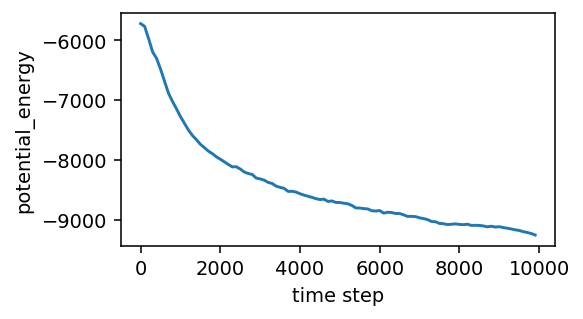

In [13]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data[:,0], data[:,1]);
pyplot.xlabel('time step');
pyplot.ylabel('potential_energy');


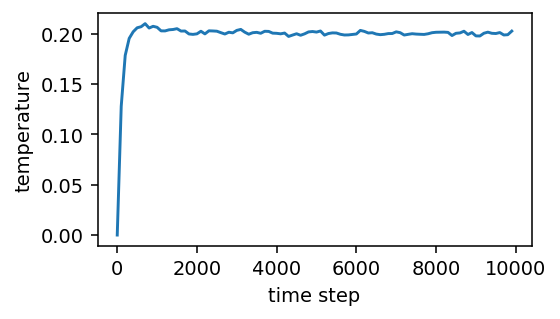

In [14]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data[:,0], data[:,2]);
pyplot.xlabel('time step');
pyplot.ylabel('temperature');
